In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import figure

In [2]:
model = load_model("D:\\git\\food_recognition\\web_app\\models\\classify_model.h5")

In [4]:
base_path = 'C:\\Users\\chanp\\Desktop\\image food\\kaggle\\test'
classes = os.listdir(base_path)
filepaths = []
labels = []
for c in classes:
    flist = os.listdir(base_path + '/' + c)
    for f in flist:
        fpath = os.path.join(base_path, c, f)
        filepaths.append(fpath)
        labels.append(c)
print ('filepaths: ', len(filepaths), '   labels: ', len(labels))

filepaths:  1440    labels:  1440


In [5]:
Fseries=pd.Series(filepaths, name='file_paths')
Lseries=pd.Series(labels, name='labels')
test_df=pd.concat([Fseries,Lseries], axis=1)
test_df=pd.DataFrame(test_df, columns = ['file_paths', 'labels'])
print(test_df['labels'].value_counts())

00    30
01    30
26    30
27    30
28    30
29    30
30    30
31    30
32    30
33    30
34    30
35    30
36    30
37    30
38    30
39    30
40    30
41    30
42    30
43    30
44    30
45    30
46    30
25    30
24    30
23    30
11    30
02    30
03    30
04    30
05    30
06    30
07    30
08    30
09    30
10    30
12    30
22    30
13    30
14    30
15    30
16    30
17    30
18    30
19    30
20    30
21    30
47    30
Name: labels, dtype: int64


In [6]:
target_size=(224,224)
batch_size=64
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input)
test_gen = test_datagen.flow_from_dataframe(test_df, x_col='file_paths', y_col='labels', target_size=target_size, batch_size=batch_size, color_mode='rgb', class_mode='categorical',shuffle=False)

Found 1440 validated image filenames belonging to 48 classes.


In [7]:
test_labels = test_gen.classes
predictions = model.predict(x=test_gen, steps=len(test_gen), verbose=0)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams.update({'font.size': 5})
    figure(figsize=(8, 6), dpi=300)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
test_gen.class_indices

{'00': 0,
 '01': 1,
 '02': 2,
 '03': 3,
 '04': 4,
 '05': 5,
 '06': 6,
 '07': 7,
 '08': 8,
 '09': 9,
 '10': 10,
 '11': 11,
 '12': 12,
 '13': 13,
 '14': 14,
 '15': 15,
 '16': 16,
 '17': 17,
 '18': 18,
 '19': 19,
 '20': 20,
 '21': 21,
 '22': 22,
 '23': 23,
 '24': 24,
 '25': 25,
 '26': 26,
 '27': 27,
 '28': 28,
 '29': 29,
 '30': 30,
 '31': 31,
 '32': 32,
 '33': 33,
 '34': 34,
 '35': 35,
 '36': 36,
 '37': 37,
 '38': 38,
 '39': 39,
 '40': 40,
 '41': 41,
 '42': 42,
 '43': 43,
 '44': 44,
 '45': 45,
 '46': 46,
 '47': 47}

Confusion matrix, without normalization
[[30  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 1  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  6  0]
 [ 0  0  0 ...  1 25  0]
 [ 0  0  0 ...  0  0 25]]


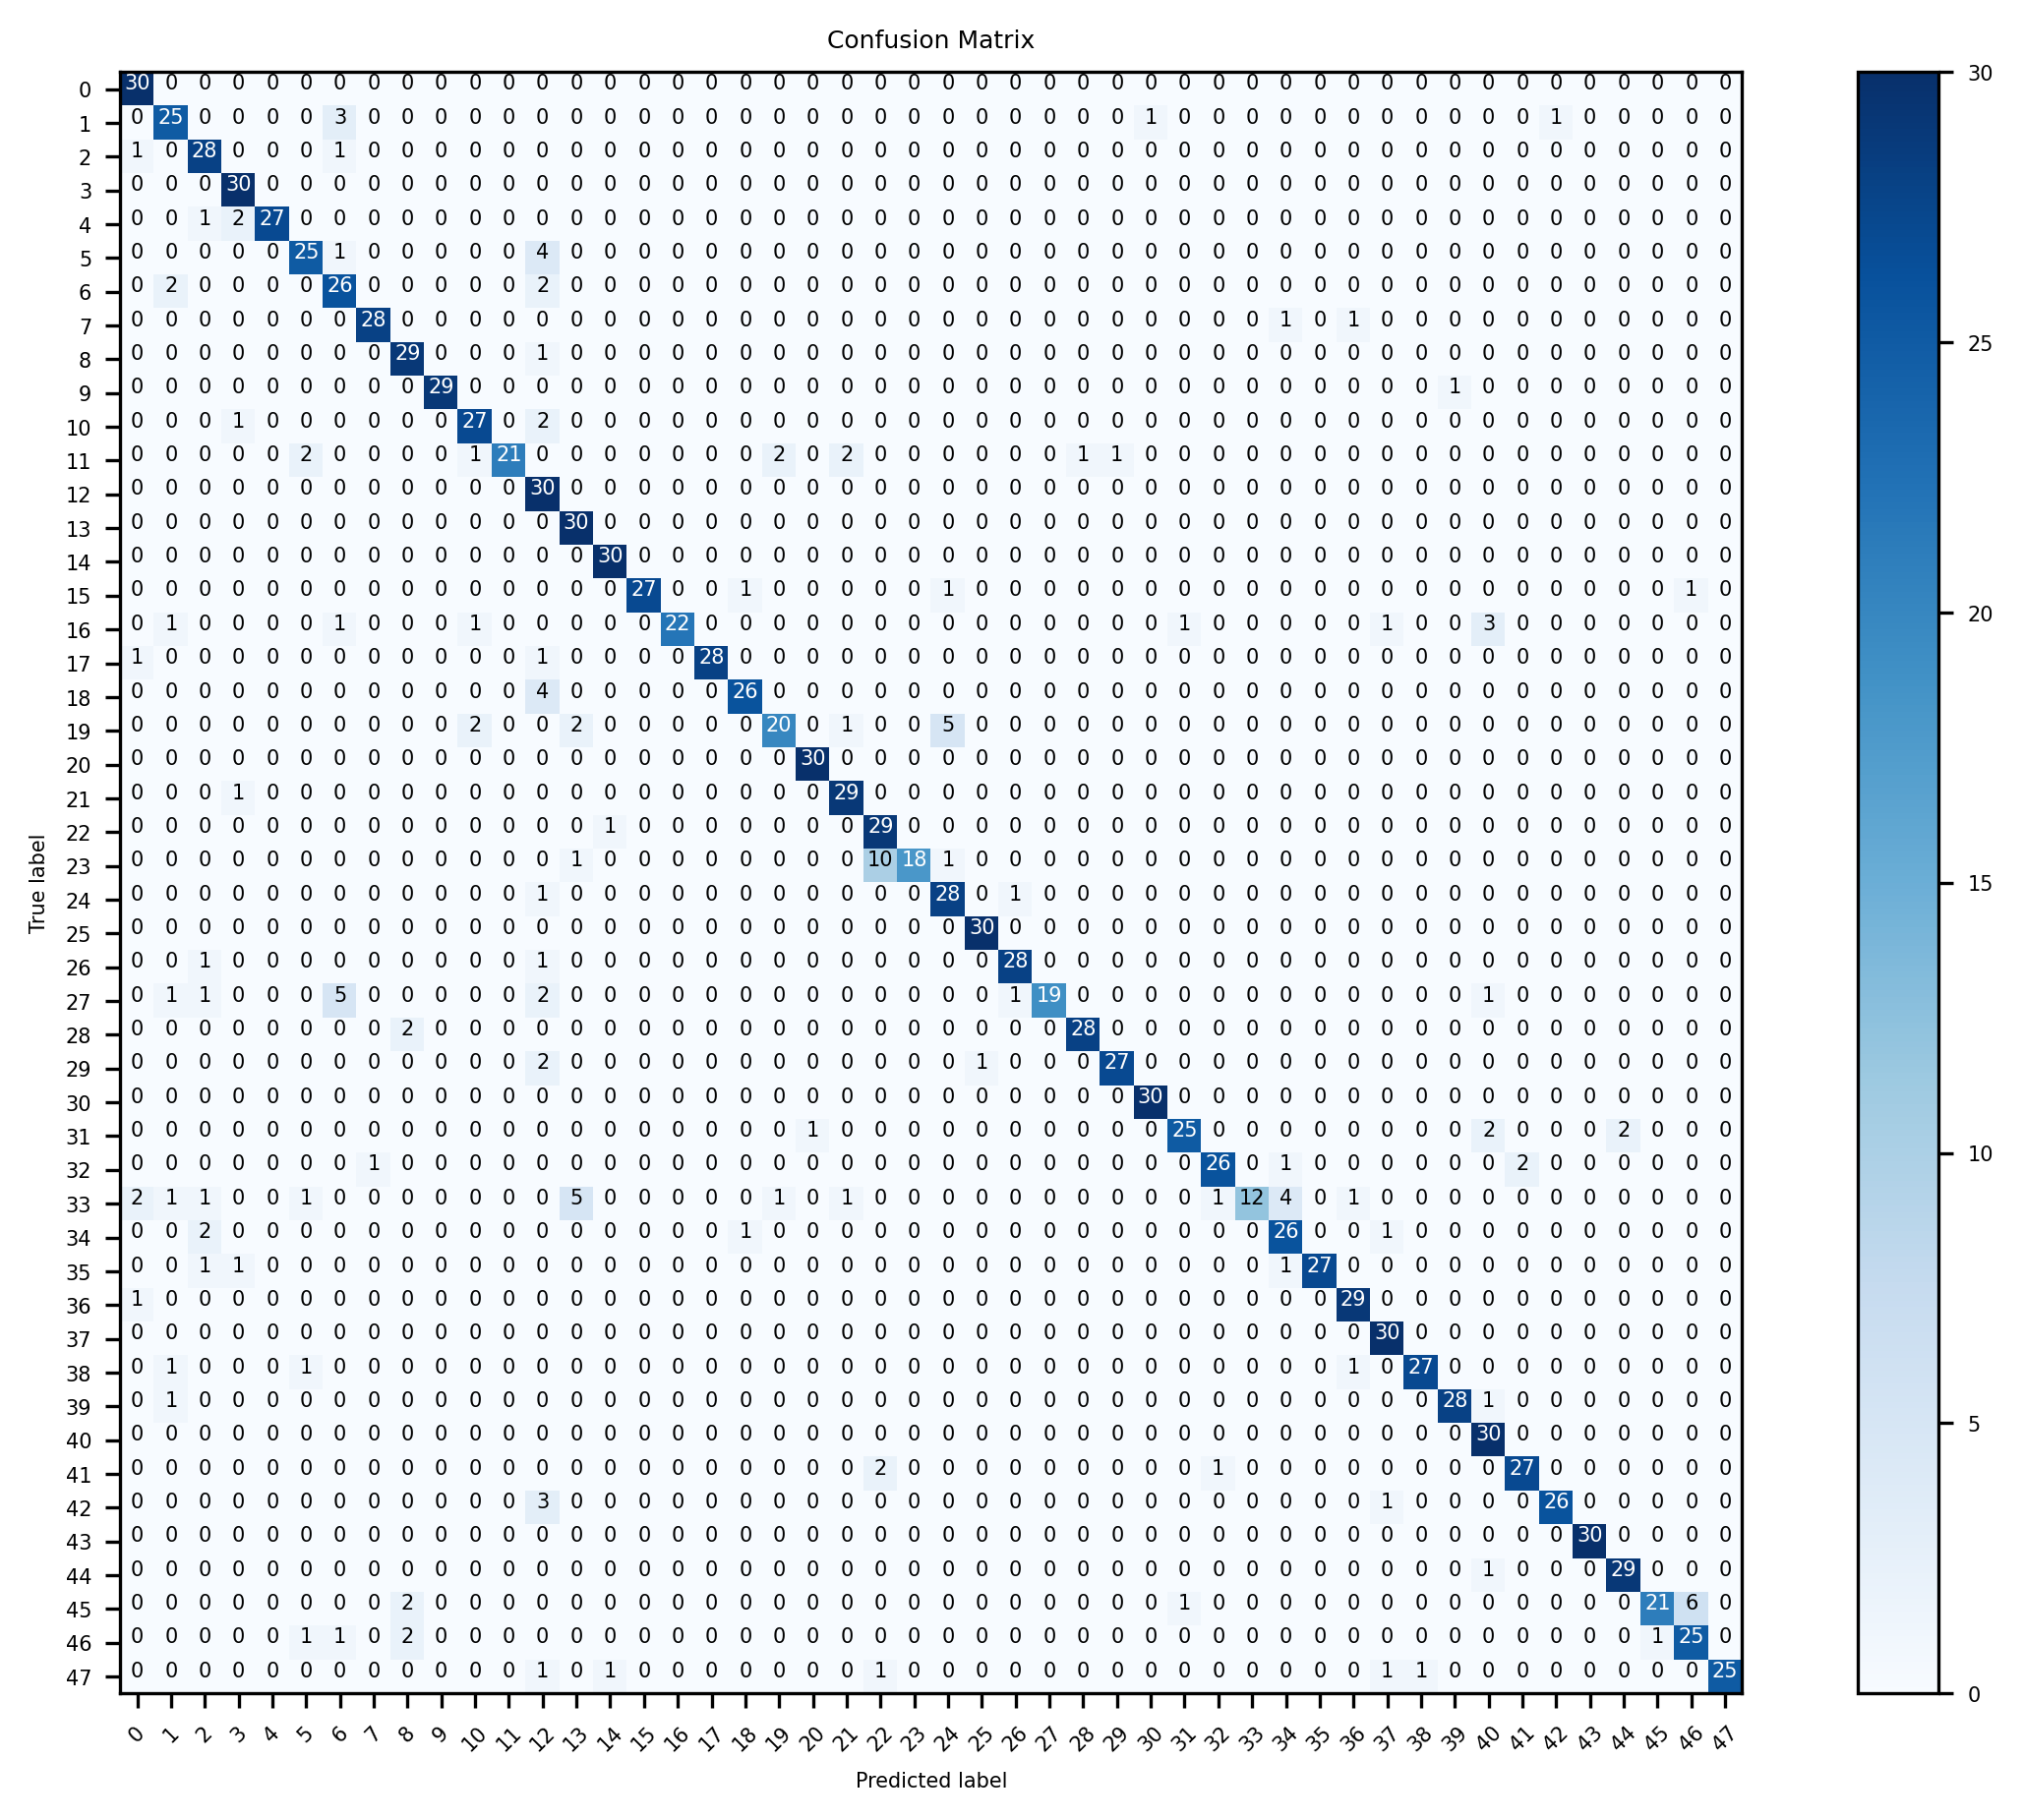

In [25]:
cm_plot_labels = np.arange(48)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

<AxesSubplot:>

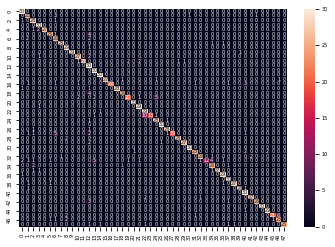

In [27]:
import seaborn as sns
sns.heatmap(cm, annot=True)

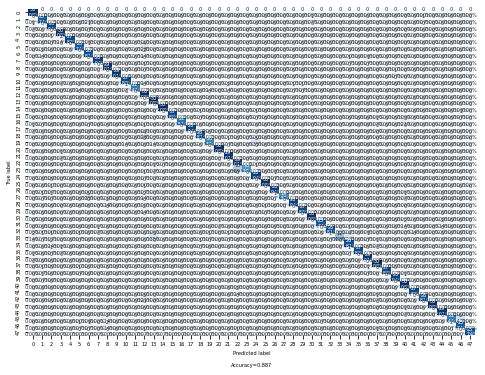

In [32]:
from cf_matrix import make_confusion_matrix
make_confusion_matrix(cm,figsize=(8,6), cbar=False)

In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)